# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import f_oneway
import ipywidgets as widgets
from IPython.display import display

In [ ]:
pwd

'/content'

# Step 2: Load and Inspect the Data

In [ ]:
df = pd.read_csv("space_traffic.csv")
print(df.head())

             Timestamp             Location       Object_Type  \
0  2024-10-21 21:00:00    Lagrange Point L2     Space Station   
1  2024-10-11 05:00:00            Orbit LEO         Satellite   
2  2024-10-29 13:00:00            Orbit LEO     Space Station   
3  2024-10-24 08:00:00  Mars Transfer Orbit  Scientific Probe   
4  2024-10-23 17:00:00    Lagrange Point L1     Space Station   

   Traffic_Density Peak_Time  
0               17     15:00  
1               21     15:00  
2               88      6:00  
3               65      8:00  
4                9      6:00  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        1000 non-null   object
 1   Location         1000 non-null   object
 2   Object_Type      1000 non-null   object
 3   Traffic_Density  1000 non-null   int64 
 4   Peak_Time        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


In [ ]:
print(df.describe())

       Traffic_Density
count      1000.000000
mean         49.305000
std          28.023227
min           1.000000
25%          26.000000
50%          48.000000
75%          73.000000
max         100.000000


# Step 3: Preprocessing Steps

### 3.1 Handle Missing Values

In [ ]:
print(df.isnull().sum())

Timestamp          0
Location           0
Object_Type        0
Traffic_Density    0
Peak_Time          0
dtype: int64




```
# This is formatted as code
```

### 3.2 Convert Timestamp and Peak_Time to Datetime Format

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Peak_Time'] = pd.to_datetime(df['Peak_Time'], format='%H:%M').dt.time

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df['Date'] = df['Timestamp'].dt.date

In [ ]:
df.head()

,Timestamp,Location,Object_Type,Traffic_Density,Peak_Time,Hour,Day_of_Week,Date
0,2024-10-21 21:00:00,Lagrange Point L2,Space Station,17,15:00:00,21,Monday,2024-10-21
1,2024-10-11 05:00:00,Orbit LEO,Satellite,21,15:00:00,5,Friday,2024-10-11
2,2024-10-29 13:00:00,Orbit LEO,Space Station,88,06:00:00,13,Tuesday,2024-10-29
3,2024-10-24 08:00:00,Mars Transfer Orbit,Scientific Probe,65,08:00:00,8,Thursday,2024-10-24
4,2024-10-23 17:00:00,Lagrange Point L1,Space Station,9,06:00:00,17,Wednesday,2024-10-23


 ### 3.3 Encode Categorical Variables

In [ ]:
df['Location'] = df['Location'].astype('category')
df['Object_Type'] = df['Object_Type'].astype('category')

In [ ]:
def show_unique_values(column):
    unique_vals = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_vals)

dropdown = widgets.Dropdown(
    options=df.columns,
    description='Select Column:',
    disabled=False
)

widgets.interactive(show_unique_values, column=dropdown)


interactive(children=(Dropdown(description='Select Column:', options=('Timestamp', 'Location', 'Object_Type', …

In [ ]:
from IPython.display import Image
image_url = 'https://vajiram-prod.s3.ap-south-1.amazonaws.com/orbit_at_different_altitudes_26f05e7560.png'
Image(url=image_url)


# Step 4: Exploratory Data Analysis (EDA)


## 4.1 Categorical vs Categorical

### 4.1.1 Count Plot

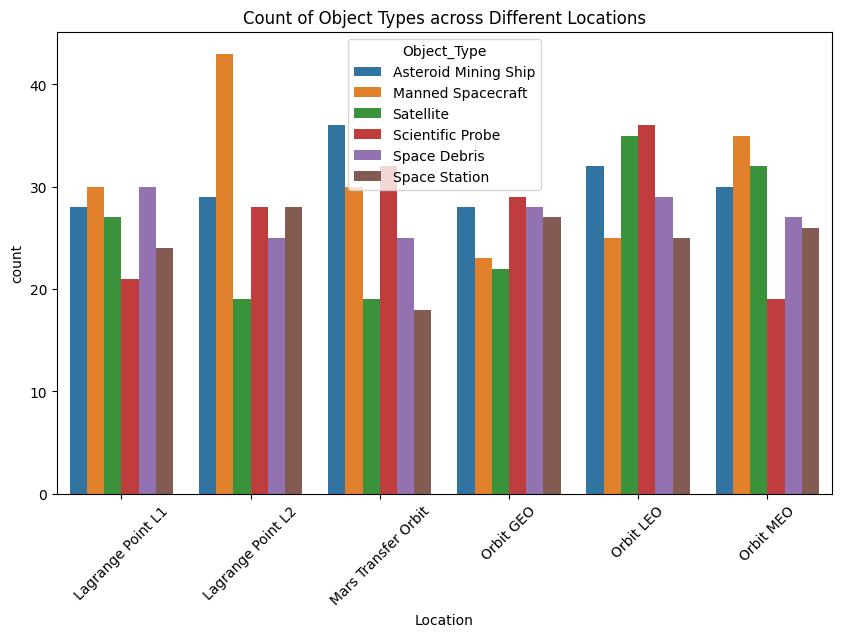

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Object_Type', data=df)
plt.title('Count of Object Types across Different Locations')
plt.xticks(rotation=45)
plt.show()

Purpose: The count plot provides insights into the distribution of different types of objects (e.g., Satellites, Space Stations) across various locations in space (e.g., Orbit LEO, Lagrange Points).

Interpretation: This plot helps identify which locations have the most traffic in terms of object types, indicating possible congestion points in space.



### 4.1.2 Histogram

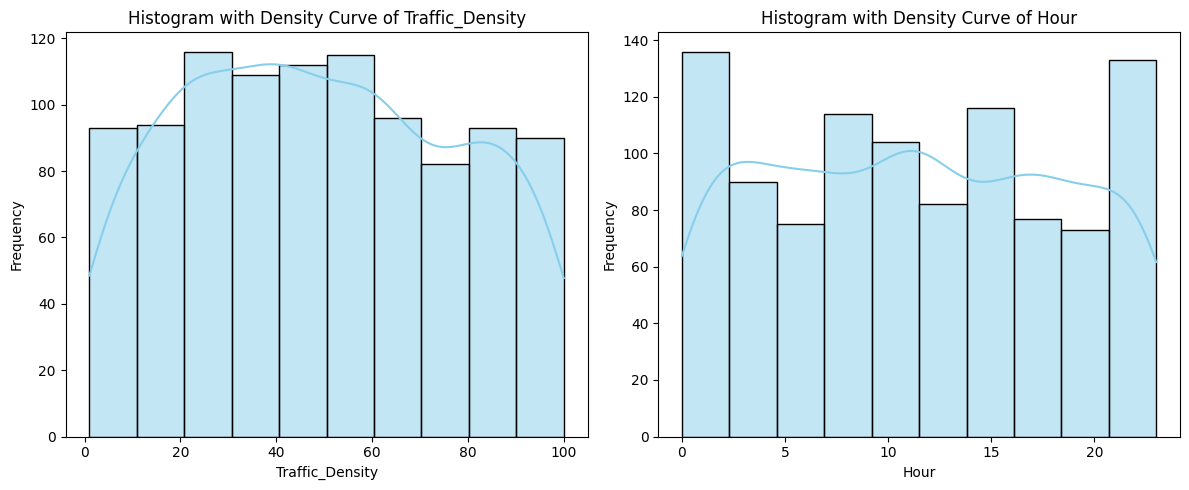

In [ ]:
numerical_columns = ['Traffic_Density', 'Hour']

plt.figure(figsize=(12, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[column], kde=True, color="skyblue", bins=10)
    plt.title(f'Histogram with Density Curve of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 4.1.3 ANOVATest

In [ ]:
object_types = df['Object_Type'].unique()
traffic_density_by_object_type = [df[df['Object_Type'] == obj]['Traffic_Density'] for obj in object_types]

anova_result = f_oneway(*traffic_density_by_object_type)
print("ANOVA Test Result:", anova_result)


ANOVA Test Result: F_onewayResult(statistic=0.9250562465910008, pvalue=0.46379219161782215)


Purpose: ANOVA (Analysis of Variance) helps determine if there are statistically significant differences in Traffic_Density across various Object_Types.
F-statistic is relatively low (0.925), indicating that the differences between the groups' means are small compared to the variability within the groups.
A p-value of 0.4638 (much greater than the common significance level of 0.05) indicates strong evidence to fail to reject the null hypothesis. In simpler terms, there isn't enough evidence to say the group means are significantly different.

In [ ]:
import plotly.express as px

heatmap_data = df.pivot_table(index='Location', columns='Object_Type', values='Traffic_Density', aggfunc='count', fill_value=0)

fig = px.imshow(
    heatmap_data,
    color_continuous_scale='Viridis',
    title="Heatmap of Object Type Count by Location",
    text_auto=True
)

fig.update_layout(
    width=600, height=600
)
fig.show()


<ipython-input-20-036d8c2b9c81>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Location', columns='Object_Type', values='Traffic_Density', aggfunc='count', fill_value=0)


Purpose: Heatmaps are effective for viewing the frequency or intensity of occurrences between two categorical variables.

Interpretation: This visualization helps identify the dominant object types in each location. You can hover over each cell to view exact counts, which can support further chi-square analysis.

## 4.2 Numerical vs Categorical

### 4.2.1 Box Plot

In [ ]:
fig = px.box(df, x='Object_Type', y='Traffic_Density', color='Object_Type',
             title="Interactive Box Plot of Traffic Density by Object Type")
fig.show()



Purpose: Box plots visualize the spread and outliers of Traffic_Density for each Object_Type, showing central tendency and variability.

### 4.2.2 Violin Plot


<ipython-input-28-41e15acdf09e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




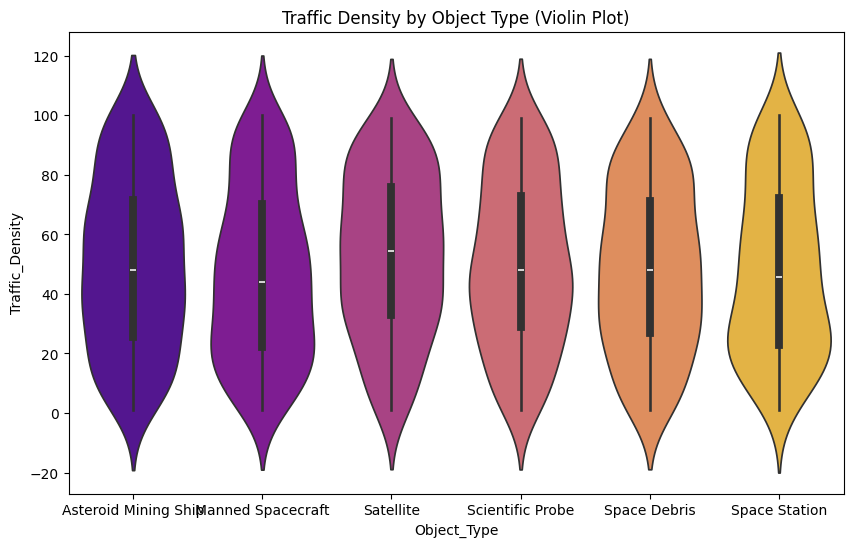

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Object_Type', y='Traffic_Density', palette='plasma')
plt.title('Traffic Density by Object Type (Violin Plot)')
plt.show()

Purpose: violin plot displays the distribution of numeric data across different categories, providing insight into the data’s spread and density.



## 4.3 Numerical vs Numerical

### 4.3.1 Scatter Plot

In [ ]:
# Ensure the 'Timestamp' column is parsed as datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Simple scatter plot without trend line
import plotly.express as px
fig = px.scatter(df, x='Hour', y='Traffic_Density', color='Location',
                 title="Scatter Plot of Traffic Density by Hour")
fig.show()


Purpose: Scatter plots with trend lines provide a visual sense of correlation between Hour and Traffic_Density.

Interpretation: You can analyze patterns over the hours to identify peak traffic times and locations with the highest densities.

### 4.3.2 Joint Plot

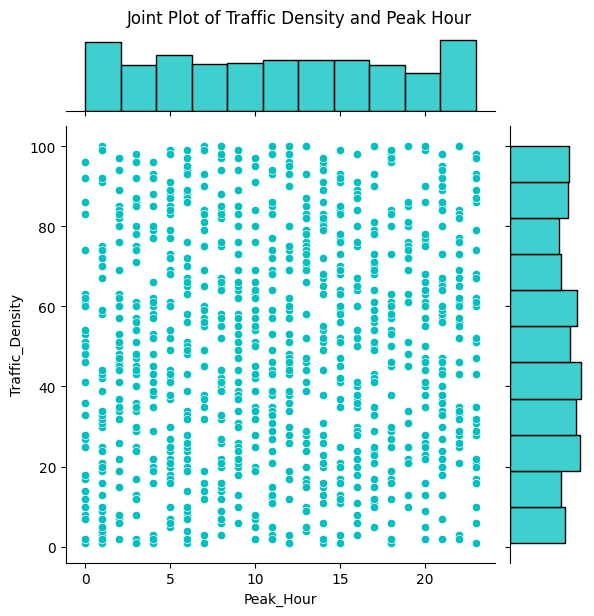

In [ ]:
df['Peak_Hour'] = pd.to_datetime(df['Peak_Time'], format='%H:%M').dt.hour
sns.jointplot(data=df, x='Peak_Hour', y='Traffic_Density', kind='scatter', color='c')
plt.suptitle('Joint Plot of Traffic Density and Peak Hour', y=1.02)
plt.show()

Purpose: Joint plots combine scatter plots with histograms, showing both the correlation and the distribution of each variable along its axis.

Interpretation: The joint plot can help detect correlations between Hour and Traffic_Density while providing a sense of the distribution of values across both variables.

## 4.4 Time Series Analysis: Numerical vs. Time

### 4.4.1 Line Plot

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour

hourly_density = df.groupby('Hour')['Traffic_Density'].mean().reset_index()

fig = px.line(hourly_density, x='Hour', y='Traffic_Density',
              title="Average Traffic Density by Hour of the Day")
fig.show()

##  4.5 Correlation between Features

Correlation Matrix:
                     Timestamp_numeric  Traffic_Density  Location_encoded  \
Timestamp_numeric             1.000000        -0.022688          0.048262   
Traffic_Density              -0.022688         1.000000         -0.040052   
Location_encoded              0.048262        -0.040052          1.000000   
Object_Type_encoded          -0.011916        -0.013228          0.004660   

                     Object_Type_encoded  
Timestamp_numeric              -0.011916  
Traffic_Density                -0.013228  
Location_encoded                0.004660  
Object_Type_encoded             1.000000  


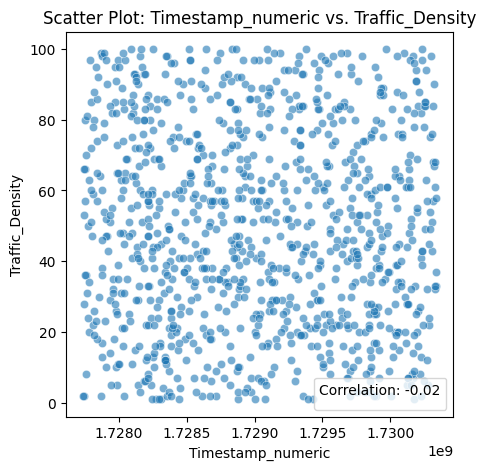

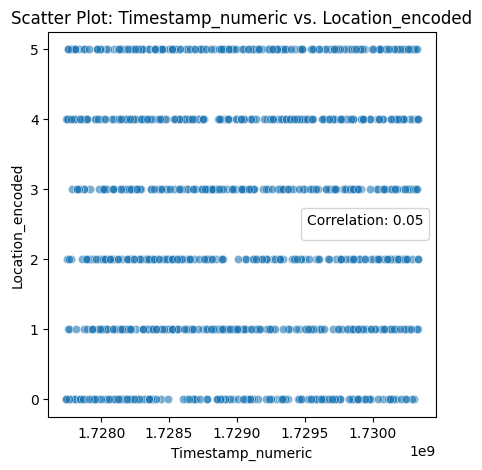

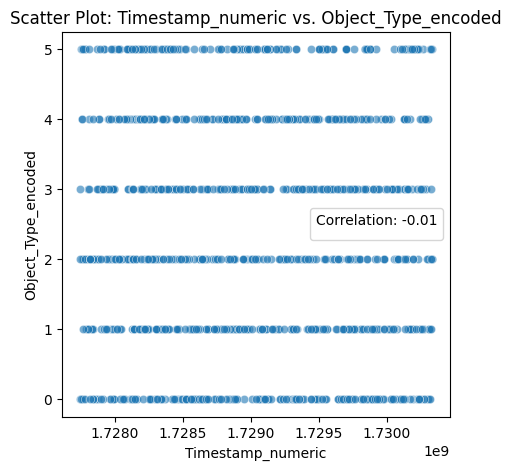

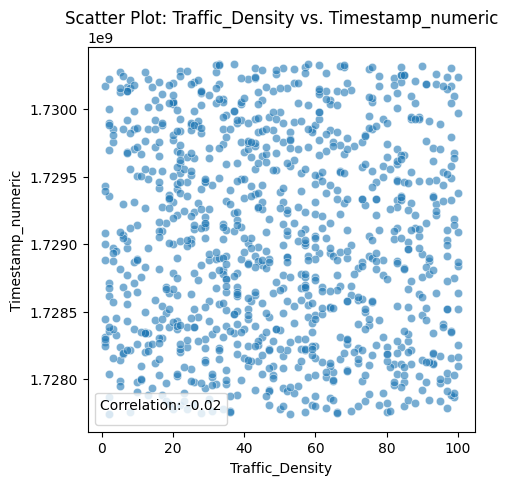

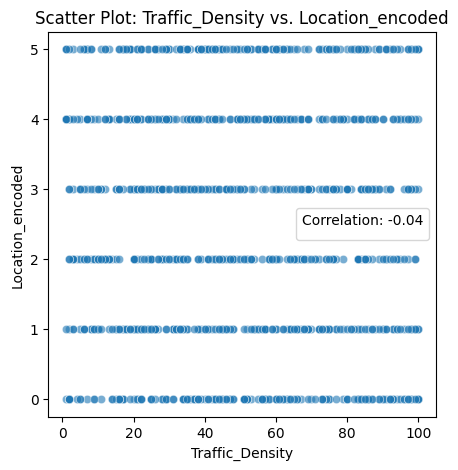

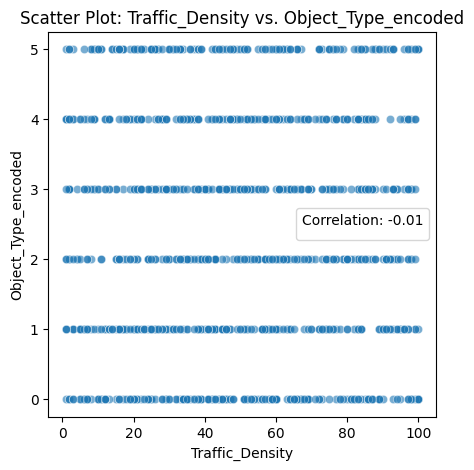

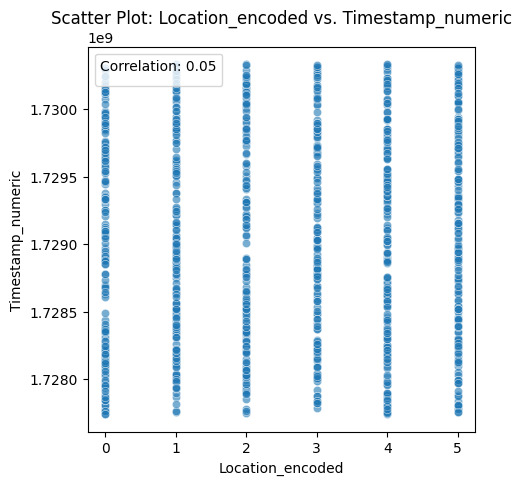

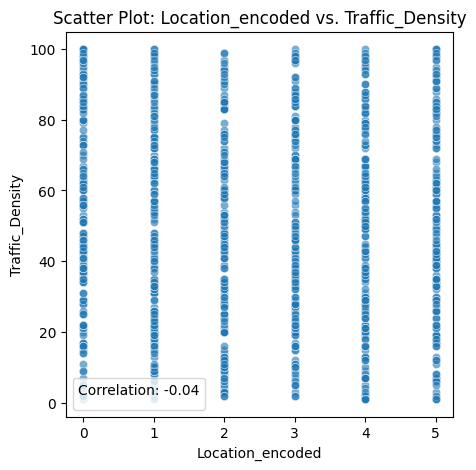

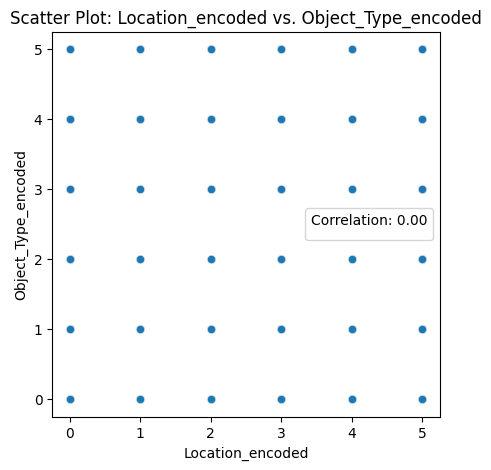

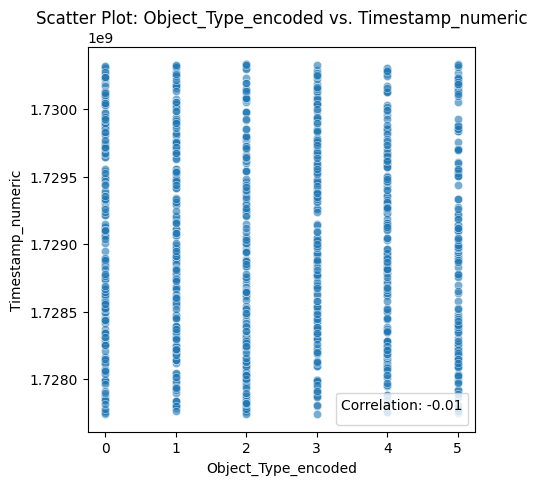

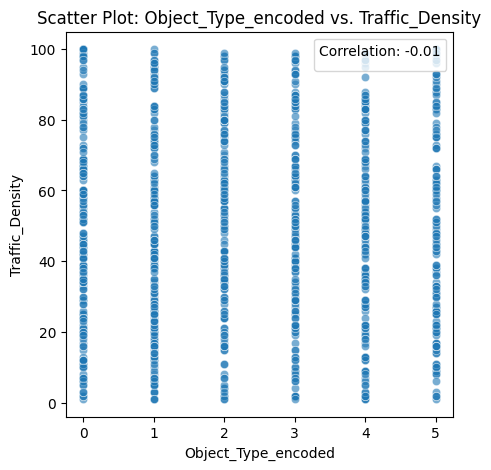

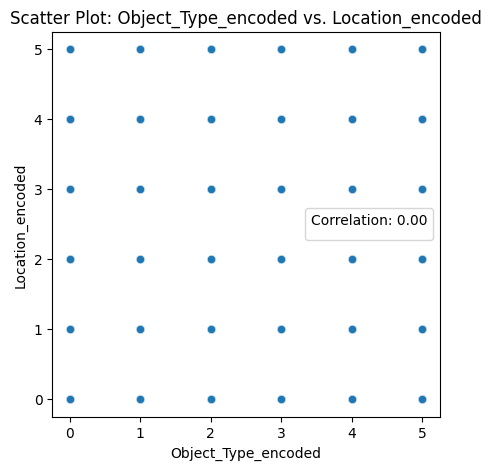

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())

df['Location_encoded'] = pd.Categorical(df['Location']).codes
df['Object_Type_encoded'] = pd.Categorical(df['Object_Type']).codes

numeric_columns = ['Timestamp_numeric', 'Traffic_Density', 'Location_encoded', 'Object_Type_encoded']
numeric_df = df[numeric_columns]

correlations = numeric_df.corr()

print("Correlation Matrix:")
print(correlations)

for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            plt.figure(figsize=(5, 5))
            sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
            correlation_value = correlations.loc[col1, col2]
            plt.title(f"Scatter Plot: {col1} vs. {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title=f"Correlation: {correlation_value:.2f}")
            plt.show()



In [ ]:
numeric_columns = ['Timestamp_numeric', 'Traffic_Density', 'Location_encoded', 'Object_Type_encoded']
numeric_df = df[numeric_columns]

correlations = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlations.values,
    x=correlations.columns,
    y=correlations.index,
    colorscale='Viridis',
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    text=correlations.round(2).values,
    texttemplate="%{text}",
))
fig.update_layout(
    title="Interactive Correlation Matrix with Annotations",
    xaxis_nticks=len(correlations.columns),
    yaxis_nticks=len(correlations.index)
)
fig.show()
